In [39]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# the welfare report calculates new consumption per capita as ((ra)/(price index))/(new labor endowment)
# for IA skilled workers in HH1

# the new labor  after the shock is: 0.254310906294
# the price index is: 0.999024
# the ra is 0.865767
print((0.865767/0.999024)/0.254310906294)
## new consumption is 3.4076903218012484
## old total consumption was 0.975728
## old consumption per capita was 0.975728/0.286974 =3.4000571480343167
###so the welfare repot value is:
print(3.4076903218012484/3.4000571480343167)

3.4076903218012484
1.0022450133731855


In [41]:
#### import msa variables and location lookups
msa_id=pd.read_stata('/Users/hannahkamen/Downloads/population-migration-master/estimation/1_main_specification/acs5yr0610/dta/msa_identifier.dta')
sl=pd.read_excel('/Users/hannahkamen/Downloads/statelookup2.xlsx')
state_age_shares=pd.read_excel('/Users/hannahkamen/Downloads/state_age_shares.xlsx')
msa_vars=pd.read_stata('/Users/hannahkamen/Downloads/population-migration-master/estimation/1_main_specification/acs5yr0610/dta/second_stage_dataset_cl.dta')

labor_fullf=pd.read_csv('/Users/hannahkamen/Downloads/le0_factorial.csv')
labor_fullf.to_stata('/Users/hannahkamen/Downloads/le0_factorial.dta')



In [42]:
###set file for imports
t='_psubsonly'

In [43]:
##### import GAMS results
#########ra characteristics

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#savings
sav0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/sav0_d_rpt.csv'%t)
del sav0_d_rpt['file']

#labor tax rate
tl0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/tl0_d_rpt.csv'%t)
del tl0_d_rpt['file']

#updated capital endowment
ke0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ke0_d_rpt.csv'%t)
del ke0_d_rpt['file']

##############################################################################
##############################################################################

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

#new welfare
w_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/w_rpt0.csv'%t)
del w_rpt0['file']

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt0.csv'%t)
del pl_rpt0['file']

###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt0.csv'%t)
del pc_rpt0['file']

###rental rate of capital
rk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/rk_rpt0.csv'%t)
del rk_rpt0['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt0.csv'%t)
del y_rpt0['file']

####imports 

a_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/a_rpt0.csv'%t)
del a_rpt0['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt0.csv'%t)
del py_rpt0['file']

####price of capital 
pk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pk_rpt0.csv'%t)
del pk_rpt0['file']

####foreign exchange price
pfx_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pfx_rpt0.csv'%t)
del pfx_rpt0['file']

####foreign exchange price
pn_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pn_rpt0.csv'%t)
del pn_rpt0['file']

####ra after shock
ra_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ra_rpt0.csv'%t)
del ra_rpt0['file']

####consumption after shock
c_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/c_rpt0.csv'%t)
del c_rpt0['file']


kd0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/kd0_rpt.csv'%t)
del kd0_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

# ###INITIAL LABOR SUPPLY
# labor_b=pd.read_csv('/Users/hannahkamen/Downloads/csv%s/le0_d_rpt00.csv'%t)
# labor_b=labor_b[['file','region','household','benchmark_le0','skill']].reset_index()
# labor_b=labor_b.rename(columns={'file':'r','region':'q','skill':'sk','household':'h'})
# del labor_b['index']


shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']


shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]



In [6]:
# ###classify census regions
# midwest=['IA','OH','WI','NE','IL','MI','SD','ND','MN','MO','IN','KS']
# south=['FL','MD','TN','WV','OK','KY','NC','VA','DE','GA','MS','TX','AL','LA','AR','SC','DC']
# west=['AK','AZ','NM','HI','CA','WA','NV','OR','ID','UT','MT','WY','CO']
# northeast=['VT','NH','CT','ME','MA','NY','NJ','PA','RI']


In [46]:
py_rpt0

,region,good,py0
0,IA,ppd,1.019831
1,IA,res,1.042878
2,IA,com,1.062958
3,IA,amb,1.053680
4,IA,fbp,1.021354
...,...,...,...
3614,CO,air,1.005071
3615,CO,mmf,1.002465
3616,CO,otr,1.017597
3617,CO,min,1.003989


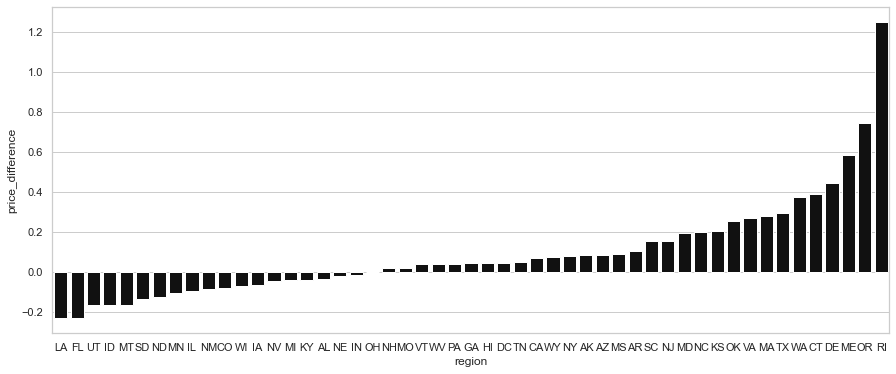

In [48]:
change_in_py=py_rpt0[py_rpt0['good']=='hou']
change_in_py['price_difference']=change_in_py['py0']-1


fig, ax = plt.subplots(1, 1,figsize=(15,6))
change_in_py=change_in_py.sort_values(by=['price_difference'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=change_in_py,
    x="region", y='price_difference',
   palette=['#111111']
)

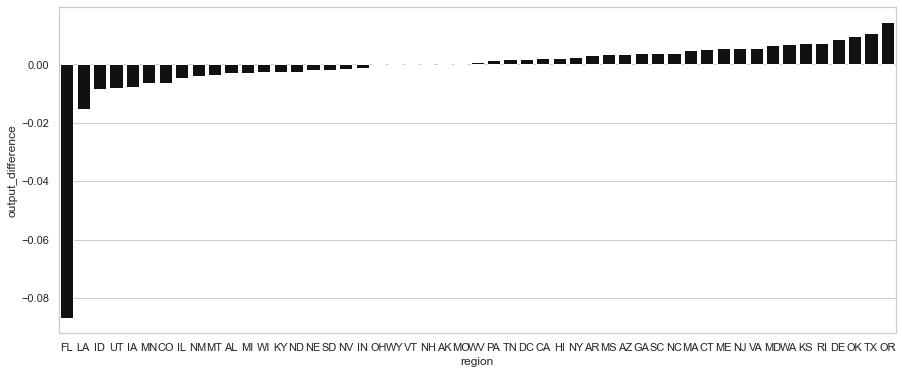

In [44]:
change_in_y=y_rpt0[y_rpt0['sector']=='hou']
change_in_y['output_difference']=change_in_y['output_shock0']-1


fig, ax = plt.subplots(1, 1,figsize=(15,6))
change_in_y=change_in_y.sort_values(by=['output_difference'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=change_in_y,
    x="region", y='output_difference',
   palette=['#111111']
)

#### Plot counterfactuals

Text(0, 0.5, 'Pct Change')

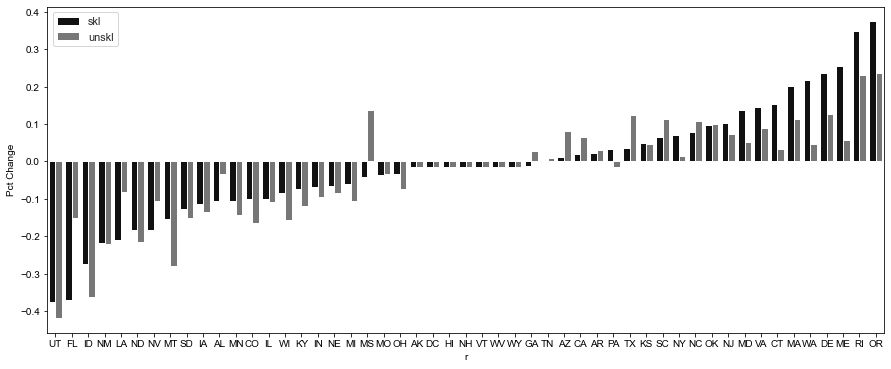

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(15,6))
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=shocks_lm,
    x="r", y='pct_shock',hue='sk',
   palette=['#111111','#777777']
)
plt.legend(loc='upper left')
plt.ylabel("Pct Change")
#g.legend.set_title("")

#### So in what states did skilled/unskilled workers exit/enter, and wage increased/decreased?

In [8]:
# CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
#                   '#f781bf', '#a65628', '#984ea3',
#                   '#999999', '#e41a1c', '#dede00']

In [9]:
labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]


labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


In [10]:
# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'1','')

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'2',labor_wage_pvt['skl_quad'] )

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'3',labor_wage_pvt['skl_quad'] )

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'4',labor_wage_pvt['skl_quad'] )



labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]>0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'1','')

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'2',labor_wage_pvt['unskl_quad'] )

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]<0)),'3',labor_wage_pvt['unskl_quad'] )

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]>0 )& (labor_wage_pvt["wage_diff_unskl"]<0)),'4',labor_wage_pvt['unskl_quad'] )


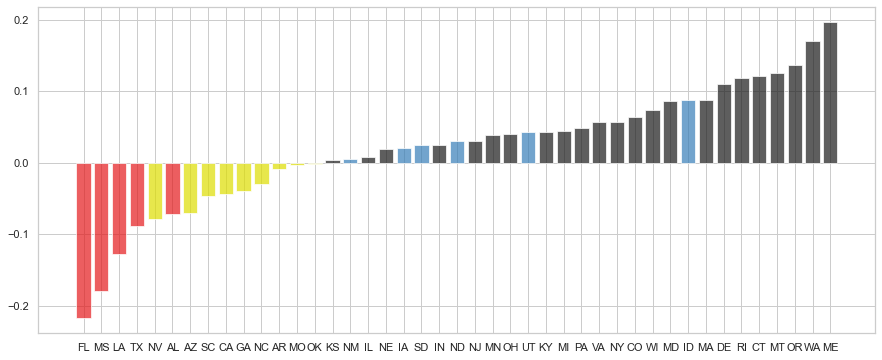

In [16]:
fig, ax = plt.subplots(1, 1,figsize=(15,6))



labor_wage_pvt=labor_wage_pvt.sort_values(by='difference',ascending=True)

colors = np.where(labor_wage_pvt['skl_quad']=='1','#377eb8','k')
colors = np.where(labor_wage_pvt['skl_quad']=='2','#e41a1c',colors)
colors = np.where(labor_wage_pvt['skl_quad']=='3','#dede00',colors)
colors = np.where(labor_wage_pvt['skl_quad']=='4','k',colors)


plt.bar(labor_wage_pvt['r'], labor_wage_pvt['difference'], color=colors,alpha=.7)
 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
plt.show()

In [12]:
####get labor splits by state

In [13]:
labor_breakout=le0_d_rpt.groupby(['region','skill'],as_index=False).sum()

labor_breakout_tot=le0_d_rpt.groupby(['region'],as_index=False).sum()
labor_breakout_tot=labor_breakout_tot.rename(columns={"benchmark_le0":"benchmark_le0_tot"})
labor_breakout=labor_breakout.merge(labor_breakout_tot,on='region')
labor_breakout['pct_total']=labor_breakout['benchmark_le0']/labor_breakout['benchmark_le0_tot']

In [17]:
labor_breakout_tot

,region,skill,benchmark_le0,benchmark_le0_tot,pct_total
39,MA,unskl,89.311979,498.659377,0.179104
63,NJ,unskl,107.247881,584.646074,0.183441
61,NH,unskl,16.722827,87.653622,0.190783
69,NY,unskl,243.194310,1269.659301,0.191543
13,CT,unskl,45.876708,235.107495,0.195131
...,...,...,...,...,...
12,CT,skl,189.230787,235.107495,0.804869
68,NY,skl,1026.464991,1269.659301,0.808457
60,NH,skl,70.930796,87.653622,0.809217
62,NJ,skl,477.398193,584.646074,0.816559


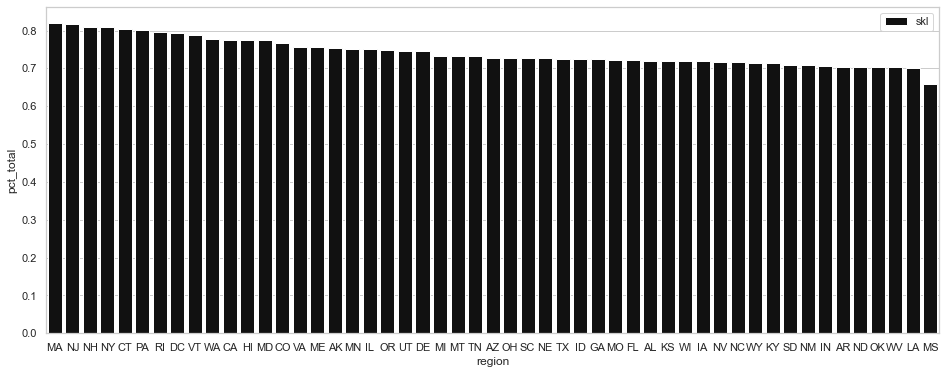

In [20]:
fig, ax = plt.subplots(1, 1,figsize=(16,6))
labor_breakout=labor_breakout.sort_values(by=['pct_total'],ascending=False)

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=labor_breakout[labor_breakout['skill']=='skl'],
    x="region", y='pct_total',hue='skill',
   palette=['#111111','#777777']
)
plt.legend(ncol=2)


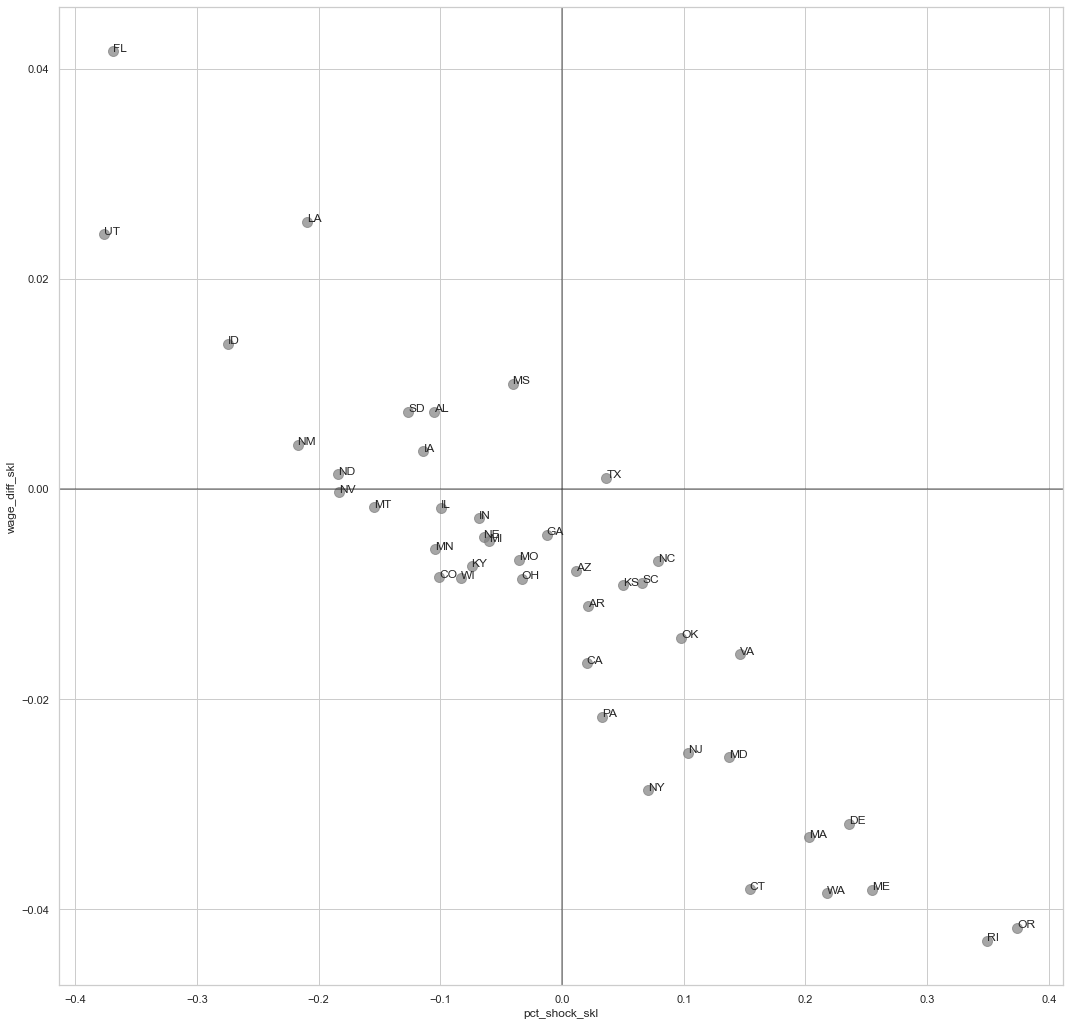

In [28]:
fig, ax = plt.subplots(1, 1,figsize=(18,18))

# colors = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'#dede00','k')

# colors = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'#e41a1c',colors)

# colors = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'#377eb8',colors)

labor_wage_pvt.plot.scatter( 'pct_shock_skl','wage_diff_skl',ax=ax,c='grey',alpha=.7,s=100)




ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_skl.iat[i],labor_wage_pvt.wage_diff_skl.iat[i]),fontsize=12)
plt.show()

In [29]:
ys0_rpte

,region,sector,good,benchmark_supply
0,IA,ppd,ppd,2.609296
1,IA,ppd,com,0.000540
2,IA,ppd,con,0.001220
3,IA,ppd,tex,0.002836
4,IA,ppd,nmp,0.002320
...,...,...,...,...
82529,CO,oil,pet,1.076900
82530,CO,oil,wht,0.000175
82531,CO,oil,che,0.010241
82532,CO,oil,min,0.004266


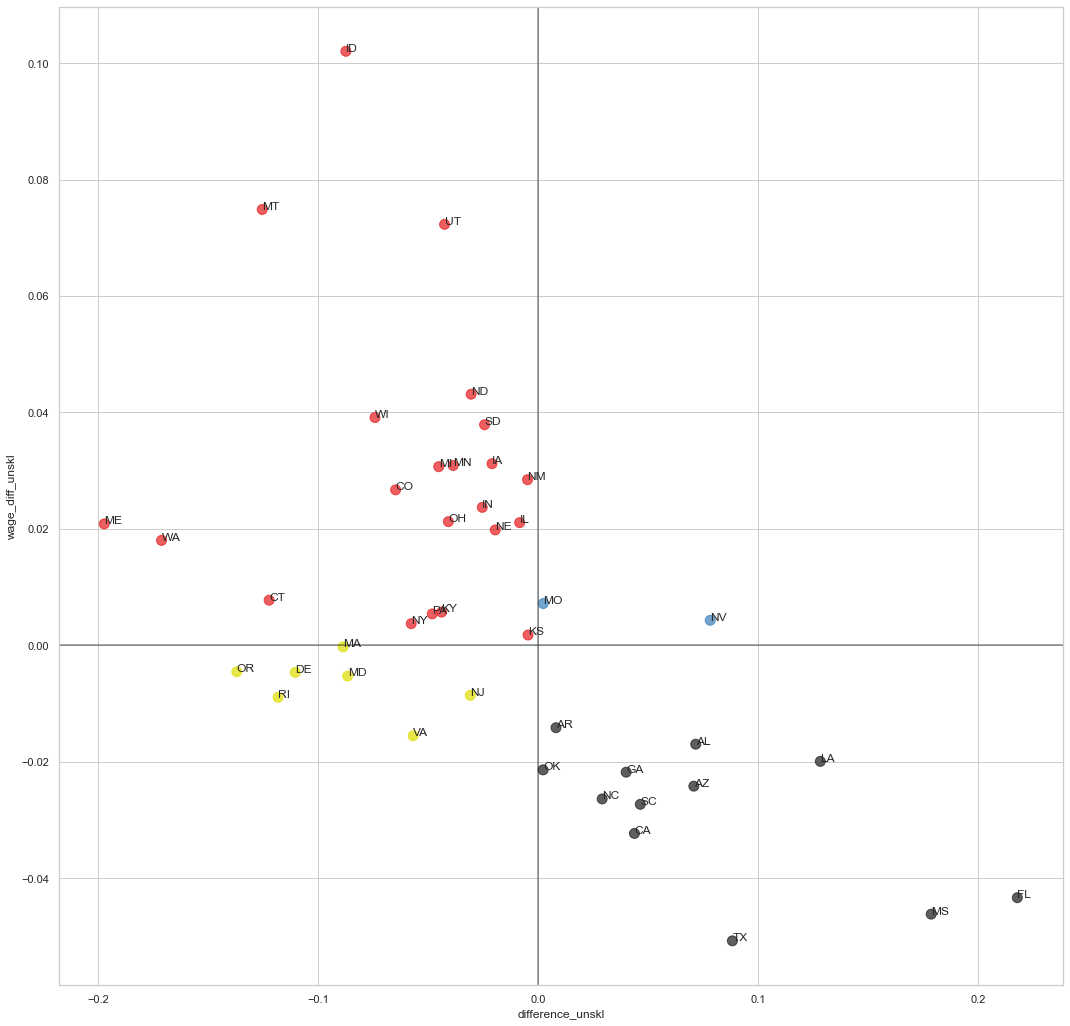

In [21]:
labor_wage_pvt['difference_unskl']=labor_wage_pvt['pct_shock_unskl']-labor_wage_pvt['pct_shock_skl']

fig, ax = plt.subplots(1, 1,figsize=(18,18))

colors = np.where(((labor_wage_pvt["difference_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]<0)),'#dede00','k')

colors = np.where(((labor_wage_pvt["difference_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'#e41a1c',colors)

colors = np.where(((labor_wage_pvt["difference_unskl"]>0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'#377eb8',colors)

labor_wage_pvt.plot.scatter( 'difference_unskl','wage_diff_unskl',ax=ax,c=colors,alpha=.7,s=100)




ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.difference_unskl.iat[i],labor_wage_pvt.wage_diff_unskl.iat[i]),fontsize=12)
plt.show()

In [ ]:
for i, txt in enumerate(df.users):
    ax.annotate(txt, (df.x.iat[i],df.y.iat[i]))
plt.show()

#### Get estimate of consumer intensity of demand by skill type

In [ ]:
####get consumer demand for goods by skill type
cd0_gr=cd0_h_d_rpt.groupby(['region','good','skill'],as_index=False).sum()
cd0_gr_tot=cd0_gr.groupby(['region','good'],as_index=False).sum()
cd0_gr_tot=cd0_gr_tot.rename(columns={'benchmark_disagg_cons':'benchmark_disagg_cons_tot'})
cd0_gr=cd0_gr_tot.merge(cd0_gr,on=['region','good'],how='inner')

####get skill intensity of each good
ld0_d_rpt=ld0_d_rpt.rename(columns={'file':'region','sector':'good'})
ld0_gr=ld0_d_rpt.groupby(['region','good','skill'],as_index=False).sum()

ld0_gr_tot=ld0_d_rpt.groupby(['region','good'],as_index=False).sum()
ld0_gr_tot=ld0_gr_tot.rename(columns={'benchmark_ld0':'benchmark_ld0_tot'})
ld0_gr=ld0_gr_tot.merge(ld0_gr,on=['region','good'],how='inner')

ld0_gr['pct_int']=ld0_gr['benchmark_ld0']/ld0_gr['benchmark_ld0_tot']
ld0_gr_pvt=ld0_gr.pivot_table(index=['region','good'], columns='skill',values='pct_int').reset_index()

####get percent of state endowment of skill used by industry
ld0_d_rpt_lm=ld0_d_rpt.rename(columns={'file':'region','sector':'good'})
ld0_d_rpt_lm=ld0_d_rpt_lm.merge(cd0_gr,on=['region','good','skill'],how='inner')
ld0_gr_s=ld0_d_rpt_lm.groupby(['region','good','skill'],as_index=False).sum()

ld0_gr_tot_s=ld0_d_rpt_lm.groupby(['region','skill'],as_index=False).sum()
ld0_gr_tot_s=ld0_gr_tot_s.rename(columns={'benchmark_ld0':'benchmark_ld0_tot'})
ld0_gr_s=ld0_gr_tot_s.merge(ld0_gr_s,on=['region','skill'],how='inner')
ld0_gr_s['ind_pct_skill_type']=ld0_gr_s['benchmark_ld0']/ld0_gr_s['benchmark_ld0_tot']

###merge skill intensity of each good with consumer demand for each good by skill type
cons_int=ld0_gr.merge(cd0_gr,on=['region','good','skill'],how='inner').merge(ld0_gr_s[['region','skill','good','ind_pct_skill_type']],on=['region','skill','good'],how='inner')
cons_int['sector_labor_int']=cons_int['benchmark_ld0']/cons_int['benchmark_ld0_tot']
cons_int['cons_demand_int']=cons_int['benchmark_disagg_cons']/cons_int['benchmark_disagg_cons_tot']    
cons_int['pct_labor_type_consumed']=cons_int['cons_demand_int']*cons_int['ind_pct_skill_type']

### pivot by skill
cons_int_pvt=cons_int.pivot_table(index=['region','good'],columns='skill',values=['cons_demand_int','ind_pct_skill_type'])
cons_int_pvt.columns = ["_".join((j,k)) for j,k in cons_int_pvt.columns]
cons_int_pvt=cons_int_pvt.reset_index()


cons_int_pvt['skilled_pct_dmd_skilled']=cons_int_pvt['cons_demand_int_skl']*cons_int_pvt['ind_pct_skill_type_skl']
cons_int_pvt['unskilled_pct_dmd_skilled']=cons_int_pvt['cons_demand_int_unskl']*cons_int_pvt['ind_pct_skill_type_skl']

cons_int_pvt['skilled_pct_dmd_unskilled']=cons_int_pvt['cons_demand_int_skl']*cons_int_pvt['ind_pct_skill_type_unskl']
cons_int_pvt['unskilled_pct_dmd_unskilled']=cons_int_pvt['cons_demand_int_unskl']*cons_int_pvt['ind_pct_skill_type_unskl']


le0_d_pvt=le0_d_rpt.groupby(['region','skill'],as_index=False).sum().pivot_table(index='region',columns=['skill'],values='benchmark_le0').reset_index()

le0_d_pvt['total_endowment']=le0_d_pvt['skl']+ le0_d_pvt['unskl']
le0_d_pvt['pct_skl']=le0_d_pvt['skl']/le0_d_pvt['total_endowment']
le0_d_pvt['pct_unskl']=le0_d_pvt['unskl']/le0_d_pvt['total_endowment']
le0_d_pvt_lm=le0_d_pvt[['region','pct_skl','pct_unskl']]


skill_intensity_demand=cons_int_pvt.groupby('region',as_index=False).sum()
####merge on workforce 
skill_intensity_demand=skill_intensity_demand.merge(le0_d_pvt_lm,on='region',how='inner')
skill_intensity_demand['skill_dmd_skill_ratio']=skill_intensity_demand['skilled_pct_dmd_skilled']/skill_intensity_demand['pct_skl']
skill_intensity_demand['unskill_dmd_skill_ratio']=skill_intensity_demand['unskilled_pct_dmd_skilled']/skill_intensity_demand['pct_unskl']

skill_intensity_demand['skill_dmd_unskill_ratio']=skill_intensity_demand['skilled_pct_dmd_unskilled']/skill_intensity_demand['pct_skl']
skill_intensity_demand['unskill_dmd_unskill_ratio']=skill_intensity_demand['unskilled_pct_dmd_unskilled']/skill_intensity_demand['pct_unskl']




#### Make stacked bar charts showing labor + capital inputs by state, skill, and good

In [ ]:
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
shocks_lm_pvt=shocks_lm.pivot_table(index='r',columns='sk',values='pct_shock').reset_index()

ld0_d_rpt=ld0_d_rpt.rename(columns={'file':'region'})
ld0_d_rpt_pvt=ld0_d_rpt.pivot_table(index=['region','sector'],columns='skill',values='benchmark_ld0').reset_index()
###group intermediate inputs
id0_rpt_gr=id0_rpt.groupby(by=['region','sector'],as_index=False).sum()

####merge with capital
int_goods=ld0_d_rpt_pvt.merge(kd0_rpt,on=['region','sector'],how='inner').merge(id0_rpt_gr,on=['region','sector'],how='inner')

#####separate by region

##classify census regions
midwest=['IA','OH','WI','NE','IL','MI','SD','ND','MN','MO','IN','KS']
south=['FL','MD','TN','WV','OK','KY','NC','VA','DE','GA','MS','TX','AL','LA','AR','SC','DC']
west=['AK','AZ','NM','HI','CA','WA','NV','OR','ID','UT','MT','WY','CO']
northeast=['VT','NH','CT','ME','MA','NY','NJ','PA','RI']



### Get Percent Labor In State

In [ ]:
labor_b_s=labor_b.groupby(['r','h','sk'],as_index=False).agg({'benchmark_le0':sum})
labor_b_s=labor_b_s.rename(columns={'benchmark_le0':'benchmark_le0_sum'})
labor_b=labor_b_s.merge(labor_b,on=['r','h','sk'])
labor_b['pct_total_labor']=labor_b['benchmark_le0']/labor_b['benchmark_le0_sum']

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,6))
labor_b_lm=labor_b[(labor_b['r']==labor_b['q'])].sort_values(by=['pct_total_labor'],ascending=True)
labor_b_lm=labor_b_lm.drop_duplicates(subset='r')

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=labor_b_lm.drop_duplicates(subset='r'),
    x="r", y='pct_total_labor',
   color='black'
)

plt.legend(ncol=8)

### Make categories of entrance / exit dataframes

In [ ]:
shocks_lm2=shocks_lm.drop_duplicates(subset=['r','q','sk'])
del shocks_lm2['q']
del shocks_lm2['h']

#####now have pct difference in output, but need to adjust this by relative level of low and high skill exit
shocks_pvt=shocks_lm.pivot_table(index='r',columns='sk',values='pct_shock',aggfunc=max).reset_index()
shocks_pvt['pct_exit_diff']=shocks_pvt['skl']-shocks_pvt['unskl']
shocks_pvt=shocks_pvt.rename(columns={'r':'region'})

shocks_lm2=shocks_lm2.pivot_table(index='r',columns='sk',values='pct_shock').reset_index()
exit=shocks_lm2[(shocks_lm2['skl']<0) & (shocks_lm2['unskl']<0) ]

exit1=list(exit[(exit['skl']< exit['unskl'])]['r'].unique())
exit2=list(exit[(exit['skl']>exit['unskl'])]['r'].unique())

entrance=shocks_lm2[(shocks_lm2['skl']>0) & (shocks_lm2['unskl']>0) ]

entrance1=list(entrance[(entrance['skl']> entrance['unskl'])]['r'].unique())
entrance2=list(entrance[(entrance['skl']<entrance['unskl'])]['r'].unique())



In [ ]:
######chart state benchmark expenditure by skill type

###import labor demand
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)

###pivot to get breakouts and total labor demand
ld0_pvt=ld0_d_rpt.pivot_table(index=['file','sector'],columns='skill',values='benchmark_ld0').reset_index()
ld0_pvt['total_labor']=ld0_pvt['skl']+ld0_pvt['unskl']
ld0_pvt['pct_skilled']=ld0_pvt['skl']/ld0_pvt['total_labor']
####rename columns
ld0_pvt=ld0_pvt.rename(columns={'file':'region'})
####group benchmark ypso
ys0_gr=ys0_rpt.groupby(['region','sector'],as_index=False).sum()

####merge on output and benchmark supply
ld0_m=ld0_pvt.merge(y_rpt0,on=['region','sector'],how='inner').merge(ys0_gr,on=['region','sector'],how='inner')
ld0_m['new_supply']=ld0_m['output_shock0']*ld0_m['benchmark_supply']

ld0_pvt_gr=ld0_pvt.groupby(['region'],as_index='False').agg({'skl':sum,'unskl':sum,'total_labor':sum}).reset_index()
ld0_pvt_gr['region_share_skilled']=ld0_pvt_gr['skl']/ld0_pvt_gr['total_labor']




#### Plot Migration

### Get Share capital and labor endowment by household

In [ ]:


cons_endow=ke0_d_rpt.merge(le0_d_rpt,on=['region','household']).groupby(['region','household'],as_index=False).sum()

In [ ]:
cons_endow['total_endowment']=cons_endow['benchmark_k']+cons_endow['benchmark_le0']
cons_endow['pct_capital_endow']=cons_endow['benchmark_k']/cons_endow['total_endowment']




### Get expenditure by top 3 most skill heaby Industries Making up largeste pct of Budget

In [ ]:
####by skill type
# hou_agg=cd0_h_d_rpt[cd0_h_d_rpt['good'].isin(['hou','amb','hos'])].groupby(['region','skill'],as_index=False).sum()
# hou_agg=hou_agg.rename(columns={'benchmark_disagg_cons':'housing_spend'})

# hou_agg_tot=cd0_h_d_rpt.groupby(['region','skill'],as_index=False).sum()
# hou_agg=hou_agg.merge(hou_agg_tot,on=['region','skill'])
# hou_agg['pct_exp_housing']=hou_agg['housing_spend']/hou_agg['benchmark_disagg_cons']


### Get Expenditure on Housing by HH and State

In [ ]:
####by region total
hou_agg=cd0_h_d_rpt[cd0_h_d_rpt['good'].isin(['hou','amb','hos'])].groupby(['region'],as_index=False).sum()
hou_agg=hou_agg.rename(columns={'benchmark_disagg_cons':'housing_spend'})

hou_agg_tot=cd0_h_d_rpt.groupby(['region'],as_index=False).sum()
hou_agg=hou_agg.merge(hou_agg_tot,on=['region'])
hou_agg['pct_exp_housing']=hou_agg['housing_spend']/hou_agg['benchmark_disagg_cons']



In [ ]:
##By household pct of individual exo
hh_exp=cd0_h_d_rpt[cd0_h_d_rpt['good'].isin(['hou','amb','hos'])].groupby(['region','household'],as_index=False).sum()
hh_exp=hh_exp.rename(columns={'benchmark_disagg_cons':'housing_spend_per_hh'})

hh_exp_tot=cd0_h_d_rpt.groupby(['region','household'],as_index=False).sum()
hh_exp=hh_exp.merge(hh_exp_tot,on=['region','household'])
hh_exp['pct_exp_housing']=hh_exp['housing_spend_per_hh']/hh_exp['benchmark_disagg_cons']

In [ ]:
##By household pct of individual exo
hh_exp2=cd0_h_d_rpt[cd0_h_d_rpt['good'].isin(['fbp','res','osv'])].groupby(['region','household'],as_index=False).sum()
hh_exp2=hh_exp2.rename(columns={'benchmark_disagg_cons':'housing_spend_per_hh'})

hh_exp_tot2=cd0_h_d_rpt.groupby(['region','household'],as_index=False).sum()
hh_exp2=hh_exp2.merge(hh_exp_tot2,on=['region','household'])
hh_exp2['pct_exp_housing']=hh_exp2['housing_spend_per_hh']/hh_exp2['benchmark_disagg_cons']

In [ ]:
len(hh_exp['region'].unique())

In [ ]:
demand_total=cd0_h_d_rpt.groupby('good',as_index=False).sum()
demand_total['pct_total']=demand_total['benchmark_disagg_cons']/(demand_total['benchmark_disagg_cons'].sum())
demand_total=demand_total.sort_values(by='benchmark_disagg_cons',ascending=False)



In [ ]:
demand_total.head(10)

In [ ]:
hou_agg_hh=cd0_h_d_rpt[cd0_h_d_rpt['good']=='amb'].groupby(['region','good','household'],as_index=False).sum()

fig, ax = plt.subplots(1, 1,figsize=(30,6))
hou_agg_hh=hou_agg_hh.sort_values(by=['household','benchmark_disagg_cons'],ascending=True)
sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=hou_agg_hh[hou_agg_hh['region'].isin(entrance1)],
    x="region", y='benchmark_disagg_cons',hue='household',
   palette='Greys'
)
plt.legend(ncol=8)
# plt.ylim(.5,.8)
plt.ylabel("Expenditure on Housing by Income Level and Region",fontsize=16)


In [ ]:
labor_b_lm

In [ ]:
hh_exp[hh_exp['region']=='MO']

In [ ]:
pl_rpt0

In [ ]:
col_map = plt.get_cmap('Paired')

In [ ]:
colors=['#91BAD6','#73A5C6','#528AAE','#2E5984','#1E3F66','#E97452','#D65D42','#C34632','#9E1711','#8B0001']

In [ ]:
for l,c in zip([exit1,exit2, entrance1, entrance2],['case 1', 'case 2', 'case 3','case 4']):
    
    for df,tag in zip([w_rpt0,pc_rpt0, pl_rpt0,shocks_lm,ld0_pvt_gr,labor_b_lm,hou_agg,hh_exp,hh_exp2,cons_endow],['welfare','CPI','Wage','pop shocks','exp on skilled','pct labor in state','exp share high skill ind','exp high skilled by hh','exp low skilled by hh','pct capital endowment']):
        
        if tag == 'welfare' or tag == 'CPI':
            
            tmp = df[df['region'].isin(l)]
            tmp['hh sk']=tmp['household'] +" "+tmp['skill']
            tmp['diff from benchmark']=tmp[tmp.columns[3]]-1
            tmp['hh sk']=tmp['household'] +" "+tmp['skill']
            tmp['diff from benchmark']=tmp[tmp.columns[3]]-1

            fig, ax = plt.subplots(1, 1,figsize=(20,6))
            tmp=tmp.sort_values(by=['region','skill','household'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=tmp,
                x="region", y='diff from benchmark',hue='hh sk',
               palette=colors
            )
            plt.legend(ncol=2)
            plt.ylabel("%s pct change from benchmark %s"%(tag,c),fontsize=16)
            
        if tag == 'Wage':
                       
            tmp = df[df['region'].isin(l)]
            tmp['diff from benchmark']=tmp[tmp.columns[2]]-1
            tmp['diff from benchmark']=tmp[tmp.columns[2]]-1

            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            tmp=tmp.sort_values(by=['diff from benchmark'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=tmp,
                x="region", y='diff from benchmark',hue='skill',
               palette=['#111111','#777777']
            )
            plt.legend(ncol=2)
            plt.ylabel("%s pct change from benchmark %s"%(tag,c),fontsize=16)
            
            
        if tag=='exp on skilled':
            
            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by=['region_share_skilled'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['region'].isin(l)],
                x="region", y='region_share_skilled',
               color='grey'
            )
            plt.legend(ncol=8)
            plt.ylim(.5,.9)
            plt.ylabel("share of bmk exp. on skilled labor by region %s" %c,fontsize=16)

            
        if tag == 'pop shocks':
            
            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by='pct_shock',ascending=True).reset_index()

            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['r'].isin(l)],
                x="r", y='pct_shock',hue='sk',
               palette=['#111111','#777777']
            )
            plt.legend(loc='upper left')
            plt.ylabel("pct labor change %s"%c)
            
        if tag =='pct labor in state':
            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by=['pct_total_labor'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['r'].isin(l)],
                x="r", y='pct_total_labor',
               color='black'
            )
            
            plt.ylabel("pct of all labor in state %s" %c,fontsize=16)
            
            
        if tag =='exp share high skill ind':
            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by=['pct_exp_housing'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['region'].isin(l)],
                x="region", y='pct_exp_housing',
               color='black'
            )
            
            plt.ylabel("pct exp high skill cons %s" %c,fontsize=16)
            
        if tag == 'exp high skilled by hh':
                              
            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by=['household','pct_exp_housing'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['region'].isin(l)],
                x="region", y='pct_exp_housing',hue='household',
               palette='Greys'
            )
            
            plt.ylabel("pct cons high skill goods %s" %c,fontsize=16)
            
            
        if tag == 'exp low skilled by hh':

            fig, ax = plt.subplots(1, 1,figsize=(8,6))
            df=df.sort_values(by=['household','pct_exp_housing'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['region'].isin(l)],
                x="region", y='pct_exp_housing',hue='household',
               palette='Greys'
            )
            
            plt.ylabel("pct cons low skill goods %s" %c,fontsize=16)
        
        if tag == 'pct capital endowment':
            
            fig, ax = plt.subplots(1, 1,figsize=(20,6))
            df=df.sort_values(by=['region','household','pct_capital_endow'],ascending=True)
            sns.set_theme(style="whitegrid")
            g = sns.barplot(
                data=df[df['region'].isin(l)],
                x="region", y='pct_capital_endow',hue='household',
               palette='Greys'
            )
            plt.legend(ncol=8)
            # plt.ylim(.5,.8)
            plt.ylabel("capital pct of total HH endowment %s"%c,fontsize=16)
            
        

            
            



            
            
    